In [1]:
## Create Latitude and Longitude Combinations

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# create arrays of latitudes & longitudes, declare each array as a variable.  
# pack the Lats & Longs as pairs into a tuple caleld "lat_lngs" using zip() function. 

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# unpack our lat_lngs zip object into a list.

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
#GENERATE RANDOM WORLD CITIES

    #match coordinates up with cities

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [8]:
## GET THE CITY WEATHER DATA 

In [9]:
## Import Dependencies, and Initialize an Empty List and Counters

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key

In [12]:
## Loop Through the List of Cities and Build the City URL

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters (set at 1 for the 1st iteration of logging for each recorded response.
record_count = 1
set_count = 1

# use the enumerate() method as an alt way to iterate through the list of cities and retrieve both city & its index from the list.
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
            time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 
    # Run an API request for each of the cities. Include try-except.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taltal
Processing Record 2 of Set 1 | yorosso
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | chaohu
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | kongoussi
Processing Record 10 of Set 1 | belaya gora
Processing Record 11 of Set 1 | cayenne
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | lata
Processing Record 14 of Set 1 | turukhansk
Processing Record 15 of Set 1 | kiruna
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | aripuana
Processing Record 18 of Set 1 | rajpipla
Processing Record 19 of Set 1 | namie
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | menongue
Processing Record 22 of S

Processing Record 34 of Set 4 | nishihara
Processing Record 35 of Set 4 | panchagarh
Processing Record 36 of Set 4 | lundazi
Processing Record 37 of Set 4 | ketchenery
City not found. Skipping...
Processing Record 38 of Set 4 | manaus
Processing Record 39 of Set 4 | tilichiki
Processing Record 40 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | cherskiy
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | macapa
Processing Record 45 of Set 4 | bougouni
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | rurrenabaque
Processing Record 48 of Set 4 | erenhot
Processing Record 49 of Set 4 | boulsa
Processing Record 50 of Set 4 | touros
Processing Record 1 of Set 5 | kodinsk
Processing Record 2 of Set 5 | coquimbo
Processing Record 3 of Set 5 | poum
Processing Record 4 of Set 5 | beringovskiy
Processing Record 5 of Set 5 | saint anthony
Processing Reco

Processing Record 28 of Set 8 | sergeyevka
Processing Record 29 of Set 8 | lubango
Processing Record 30 of Set 8 | tel aviv-yafo
Processing Record 31 of Set 8 | hamina
Processing Record 32 of Set 8 | vanimo
Processing Record 33 of Set 8 | fortuna
Processing Record 34 of Set 8 | san jose
Processing Record 35 of Set 8 | lulea
Processing Record 36 of Set 8 | huarmey
Processing Record 37 of Set 8 | constitucion
Processing Record 38 of Set 8 | airai
Processing Record 39 of Set 8 | addi ugri
City not found. Skipping...
Processing Record 40 of Set 8 | salalah
Processing Record 41 of Set 8 | sioux lookout
Processing Record 42 of Set 8 | labuan
Processing Record 43 of Set 8 | palmas de monte alto
Processing Record 44 of Set 8 | sakakah
Processing Record 45 of Set 8 | la romana
Processing Record 46 of Set 8 | kavaratti
Processing Record 47 of Set 8 | saposoa
Processing Record 48 of Set 8 | ibimirim
Processing Record 49 of Set 8 | hinton
Processing Record 50 of Set 8 | ukiah
Processing Record 1 o

Processing Record 18 of Set 12 | torres
Processing Record 19 of Set 12 | bud
Processing Record 20 of Set 12 | south yuba city
Processing Record 21 of Set 12 | ekhabi
Processing Record 22 of Set 12 | baie-comeau
Processing Record 23 of Set 12 | yaan
Processing Record 24 of Set 12 | yumen
Processing Record 25 of Set 12 | bandarbeyla
Processing Record 26 of Set 12 | brufut
Processing Record 27 of Set 12 | bilopillya
Processing Record 28 of Set 12 | presidencia roque saenz pena
Processing Record 29 of Set 12 | lasa
Processing Record 30 of Set 12 | sao joao da barra
Processing Record 31 of Set 12 | faya
Processing Record 32 of Set 12 | ouesso
Processing Record 33 of Set 12 | castro verde
Processing Record 34 of Set 12 | anloga
Processing Record 35 of Set 12 | ixtapa
Processing Record 36 of Set 12 | hirado
Processing Record 37 of Set 12 | mascote
Processing Record 38 of Set 12 | morecambe
Processing Record 39 of Set 12 | rio gallegos
Processing Record 40 of Set 12 | moron
Processing Record 4

In [14]:
len(city_data)

580

In [15]:
#CREATE A DATAFRAME OF CITY WEATHER DATA 

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taltal,-25.4000,-70.4833,67.87,76,24,5.48,CL,2022-01-05 23:07:26
1,Yorosso,12.3536,-4.7761,70.59,17,40,6.87,ML,2022-01-05 23:07:26
2,Hilo,19.7297,-155.0900,80.80,75,20,9.22,US,2022-01-05 23:07:27
3,Mataura,-46.1927,168.8643,54.48,57,84,7.54,NZ,2022-01-05 23:07:27
4,Arraial Do Cabo,-22.9661,-42.0278,76.41,87,100,9.04,BR,2022-01-05 23:07:27
5,Norman Wells,65.2820,-126.8329,-23.48,94,58,2.93,CA,2022-01-05 23:06:05
6,Chaohu,31.6000,117.8667,40.60,82,100,8.19,CN,2022-01-05 23:07:27
7,Kongoussi,13.3258,-1.5347,69.78,18,81,9.24,BF,2022-01-05 23:07:28
8,Belaya Gora,68.5333,146.4167,-29.72,99,100,3.98,RU,2022-01-05 23:07:28
9,Cayenne,4.9333,-52.3333,79.09,88,75,3.00,GF,2022-01-05 23:07:28


In [17]:
# reorder columns.
new_column_order = ["City", "Country", "Date" , "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taltal,CL,2022-01-05 23:07:26,-25.4000,-70.4833,67.87,76,24,5.48
1,Yorosso,ML,2022-01-05 23:07:26,12.3536,-4.7761,70.59,17,40,6.87
2,Hilo,US,2022-01-05 23:07:27,19.7297,-155.0900,80.80,75,20,9.22
3,Mataura,NZ,2022-01-05 23:07:27,-46.1927,168.8643,54.48,57,84,7.54
4,Arraial Do Cabo,BR,2022-01-05 23:07:27,-22.9661,-42.0278,76.41,87,100,9.04
5,Norman Wells,CA,2022-01-05 23:06:05,65.2820,-126.8329,-23.48,94,58,2.93
6,Chaohu,CN,2022-01-05 23:07:27,31.6000,117.8667,40.60,82,100,8.19
7,Kongoussi,BF,2022-01-05 23:07:28,13.3258,-1.5347,69.78,18,81,9.24
8,Belaya Gora,RU,2022-01-05 23:07:28,68.5333,146.4167,-29.72,99,100,3.98
9,Cayenne,GF,2022-01-05 23:07:28,4.9333,-52.3333,79.09,88,75,3.00


In [19]:
# Create the output file (CSV) & save dataframe in selected folder.
output_data_file = "weather_data/cities.csv"

# Export the City_Data dataframe into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# add config, API_practice & random_numbers .ipynb files to gitignore.

In [21]:
#PLOT LATITUDE VS. TEMPERTAURE

In [22]:
## GET DAT AFOR PLOTTING

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

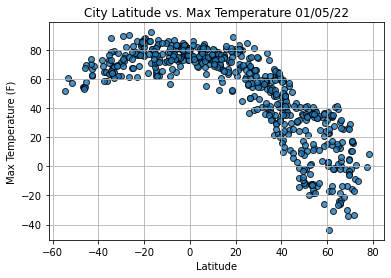

In [24]:
# create scatter plot for latitude vs max temp 

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


In [25]:
#PLOT LATITUDE VS HUMIDITY

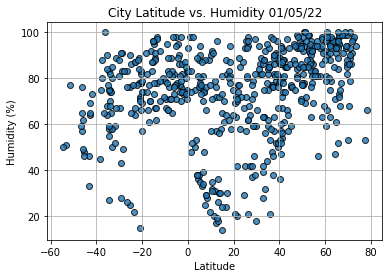

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [27]:
#PLOT LATITUDE VS. CLOUDINESS

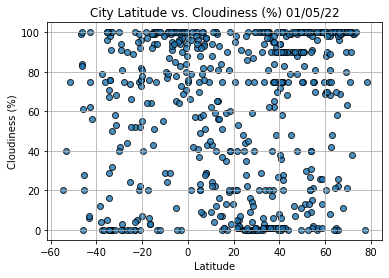

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [29]:
#PLOT LATITUDE VS. WIND SPEED

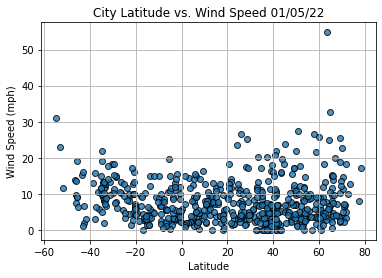

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
#FIND CORRELATION BETWEEN LATITUDE AND MAXIMUM TEMPERATURE

In [32]:
# reuse algorithm code (making changes for weather parameters in each hemisphere)  that performs liner regression adding data to scatter plot. 

In [33]:
## Create A Linear Regression Function 

In [34]:
# Import linregress
from scipy.stats import linregress

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
## Create the Hemisphere DataFrames 

In [37]:
# use iloc method on city_data on index 13.
index13 = city_data_df.loc[13]
index13

City                       Kiruna
Country                        SE
Date          2022-01-05 23:07:29
Lat                       67.8557
Lng                       20.2251
Max Temp                    -2.11
Humidity                       91
Cloudiness                     11
Wind Speed                   7.09
Name: 13, dtype: object

In [38]:
# filter to get all Northern Hemisphere Lats >/ 0 

city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
575     True
576     True
577    False
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [39]:
# combine iloc w/ N.Hemisph filter

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Yorosso,ML,2022-01-05 23:07:26,12.3536,-4.7761,70.59,17,40,6.87
2,Hilo,US,2022-01-05 23:07:27,19.7297,-155.0900,80.80,75,20,9.22
5,Norman Wells,CA,2022-01-05 23:06:05,65.2820,-126.8329,-23.48,94,58,2.93
6,Chaohu,CN,2022-01-05 23:07:27,31.6000,117.8667,40.60,82,100,8.19
7,Kongoussi,BF,2022-01-05 23:07:28,13.3258,-1.5347,69.78,18,81,9.24


In [40]:
# assign dataframe to a variable 

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [41]:
## Perform Linear Regression on the Maximum Temp for the North Hemisphere.

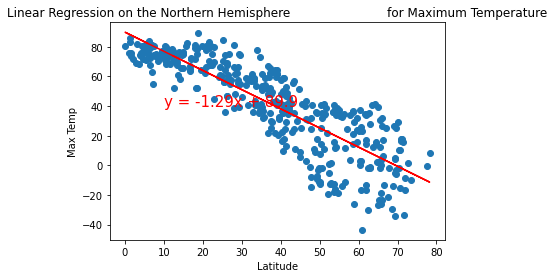

In [42]:
# call regression function edit parameters for max temp. 

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [43]:
## Perform Linear Regression on the Maximum Temp for the South Hemisphere.

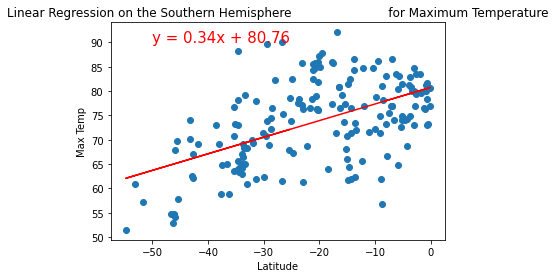

In [44]:
# call regression function edit parameters for max temp. 

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


In [45]:
#FIND THE CORRELATION BETWEEN LATITUDE AND PERCENT HUMIDITY

In [46]:
## Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

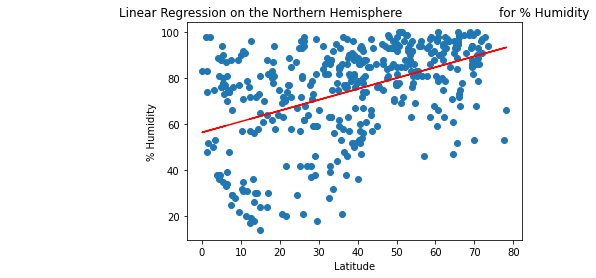

In [51]:
# Linear regression on Percent Humidity for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(-50,90))

In [48]:
## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

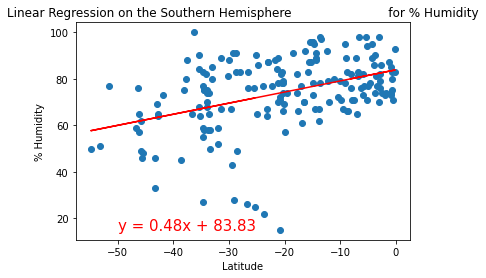

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [52]:
#FIND THE CORRELATION BETWEEN LATITUDE AND PERCENT CLOUDINESS

In [53]:
## Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

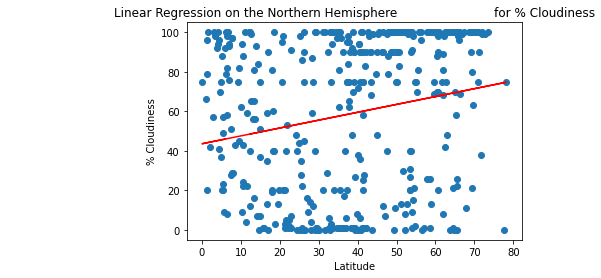

In [55]:
# Linear regression on Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [56]:
## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

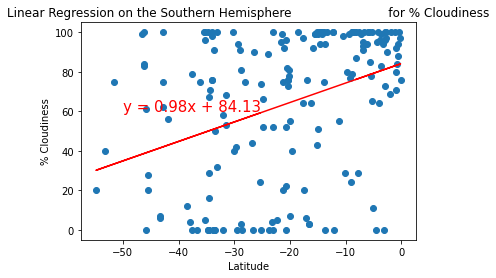

In [58]:
# Linear regression on the Southern Hemisphere (Lat. vs % cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [59]:
#FIND THE CORRELATION BETWEEN LATITUDE AND WIND SPEED

In [60]:
## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

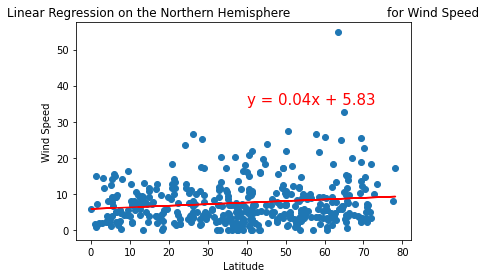

In [62]:
# Linear regression on the Northern Hemisphere (Lat vs Wind Speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


In [63]:
## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

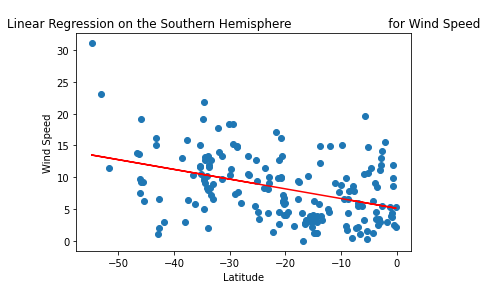

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))